In [1]:
include("../src/intersections.jl")

In [2]:
PolygonalChain(10)

PolygonalChain(Point[Point(0.125861250832561832879719077027402818202972412109375, 0.4635451872490279345839780944515950977802276611328125, 0.1752093193493866607468589791096746921539306640625), Point(0.0279682500514810694625111864297650754451751708984375, 0.026713334868339710936879782821051776409149169921875, 0.5864635227114103344092654879204928874969482421875), Point(0.567130046105878360407359650707803666591644287109375, 0.70942319800647712924046572879888117313385009765625, 0.1154531115615309300181934304418973624706268310546875), Point(0.33012724214652156007332450826652348041534423828125, 0.344203192583284245387176270014606416225433349609375, 0.49483716447770209612144753918983042240142822265625), Point(0.90501098588769135488973915926180779933929443359375, 0.785767596933814704840415288344956934452056884765625, 0.5141858456687986578259597081341780722141265869140625), Point(0.538939132807917165024491623626090586185455322265625, 0.41120008612668978997817248455248773097991943359375, 0.915128

In [48]:
function checkXYIntersection(P::PolygonalChain)::Bool
    n::Int64 = length(P)
    inter::Bool = false
    c::Int64 = 1
    while !inter && c <= n
        i::Int64 = c+1
        while !inter && i <= n
            #println("holi")
            vp::Point = P[i+1] - P[i]
            vq::Point = P[c+1] - P[c]
            x = xySegmentIntersection(P[i],P[i+1],vp,P[c],P[c+1],vq)
            inter =inter || x
            i+=1
        end
        c+=1;
    end
    return inter;
end

checkXYIntersection (generic function with 1 method)

In [80]:
n = 10
tries = 10000
res = true
c = 0
P = PolygonalChain(n)
while res && c < tries
    P = PolygonalChain(n)
    res = checkXYIntersection(P)
    c+=1
end

In [81]:
c

45

In [82]:
val = to2DArray(P)

10×3 Base.Matrix{BigFloat}:
 0.703067   0.628171  0.702103
 0.544932   0.415739  0.343631
 0.949579   0.585428  0.155205
 0.835342   0.951209  0.944976
 0.262003   0.982222  0.826251
 0.215773   0.91197   0.475641
 0.529998   0.738774  0.115512
 0.335434   0.122879  0.648734
 0.143304   0.734817  0.214734
 0.0590332  0.648878  0.19213

In [83]:
using Plots

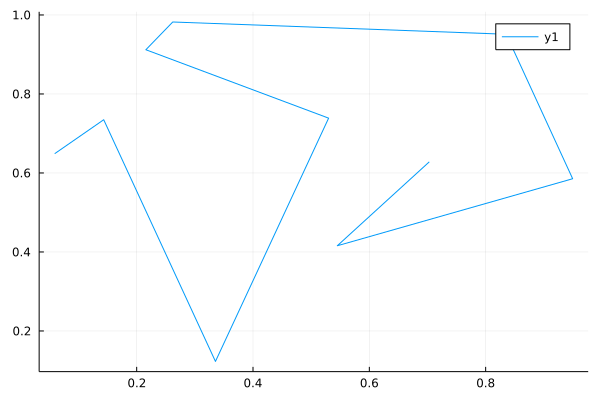

In [84]:
plot(val[:,1],val[:,2])

In [85]:
using DelimitedFiles
writedlm("../../tesisMaestriaAldo/scripts/nonIter.csv",to2DArray(P),',')